In [1]:
import py21cmfast as p21c
from py21cmfast import plotting
import os
from astropy.io import fits
import numpy as np
import matplotlib.pyplot as plt

#coeval = p21c.run_coeval(
#     redshift=8.0,
#     user_params={'HII_DIM': 100, "USE_INTERPOLATION_TABLES": False}
# )

#p21c.plotting.coeval_sliceplot(coeval, kind='brightness_temp')

/Users/student2/opt/anaconda3/envs/radio/lib/python3.9/site-packages/py21cmfast/_cfg.py:57: UserWarning: Your configuration file is out of date. Updating...
  warnings.warn(
/Users/student2/opt/anaconda3/envs/radio/lib/python3.9/site-packages/py21cmfast/_cfg.py:41: UserWarning: Your configuration file is out of date. Updating...
  warnings.warn("Your configuration file is out of date. Updating...")


In [7]:
lightcone = p21c.run_lightcone(
    redshift = 5.5,
    max_redshift = 12.5,
    user_params = {"HII_DIM":128, "BOX_LEN": 600}, #3 degrees field of view
    lightcone_quantities=("brightness_temp", 'density'),
    global_quantities=("brightness_temp", 'density', 'xH_box'),
    direc='_cache'
)

(128, 128, 407)


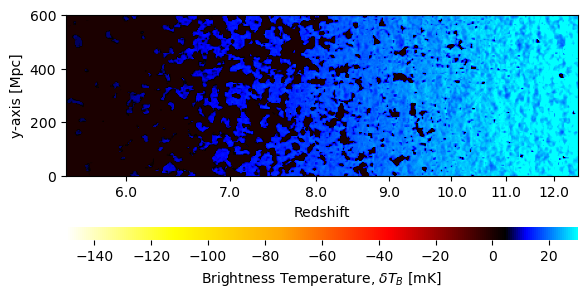

In [8]:
plotting.lightcone_sliceplot(lightcone);
print(lightcone.shape)

In [16]:
redshifts = getattr(lightcone , 'lightcone_redshifts')

5.500000006120296
12.535347518700492


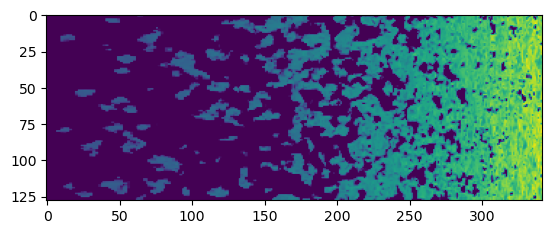

In [18]:
#could use observedlightcone code from vlad to slice lightcone
cone = lightcone.brightness_temp
# n_steps nuber of slices needed
n_steps = 342
dims = (lightcone.shape)[0]
z = np.linspace(redshifts[0],redshifts[-1],n_steps)

lc = np.zeros((dims,dims,n_steps))
#noise data : 108MHz to 210.3MHZ with seperation of 0.3MHZ
#use different values for different noise
dt =0.3 #Mhz

for i in range(342):
    freq = 210.3 - (dt*i)
    zlc = (1420/freq) -1
    index = np.abs(z - zlc).argmin()
    lc[:,:,i] = cone[:,:,index]
    
plt.imshow(lc[45,:,:])
    


In [19]:
dir = './Boxes/'

#change file name for different lightcones
fname = 'test'


#save lightcone in boxes folder
fits.writeto(dir+fname+'.fits',np.transpose(lc,(2,0,1)),overwrite=True)